# Data Scientist Professional Case Study

### Company Background

Nearly New Nautical is a website that allows users to advertise their used boats for sale. When users list their boat, they have to provide a range of information about their boat. Boats that get lots of views bring more traffic to the website, and more potential customers. 

To boost traffic to the website, the product manager wants to prevent listing boats that do not receive many views.




### Customer Question

The product manager wants to know the following:
- Can you predict the number of views a listing will receive based on the boat's features?



### Success Criteria

The product manager would consider using your model if, on average, the predictions were only 50% off of the true number of views a listing would receive.


### Dataset

The data you will use for this analysis can be accessed here: `"data/boat_data.csv"`

# Tec Report

### Imports and Install

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt


import pandas as pd
import numpy as np

### Data Preparation - EDA, Validation, Cleaning and Transformation 

#### Data Ingestion

In [69]:
boat_data=pd.read_csv("data/boat_data.csv")

#### Cleaning

In [70]:
boat_data.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
0,CHF 3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75
2,CHF 3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124
3,DKK 25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58


In [71]:
boat_data.shape

(9888, 10)

Base on the info above. The Daset has 9888 lines and 10 colunms (Features), where 6 of feature are categorical and 4 are numerical.  The Price has two compoments, a categorical and a nuneric.   

<AxesSubplot:>

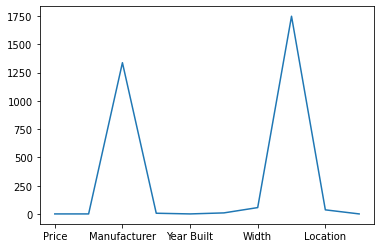

In [72]:
boat_data.isnull().sum().plot()

The figure above shows, that the Manufacturee and Type has more than 1k itens with null values. It is ralevant because this reprasate more tham 10% of samples.
To not exclued this data bellow it will be create a new categoric for both features call not "Not defined" and all order null values will be exclued. 

In [73]:
boat_data["Manufacturer"] = boat_data["Manufacturer"].fillna("Not Defined")
boat_data["Material"] = boat_data["Material"].fillna("Not Defined")
boat_data = boat_data.dropna() 

In [74]:
boat_data.isnull().sum()

Price                          0
Boat Type                      0
Manufacturer                   0
Type                           0
Year Built                     0
Length                         0
Width                          0
Material                       0
Location                       0
Number of views last 7 days    0
dtype: int64

As shown above, all null data ware remove. Than the cleaning job is done and the data is ready to analysis. 

#### EAD and Transformation 

##### Frist Look

Let's analise all relevant features in order to make the necessary transformation to give good data for the models. 

Using PairPlot from Seaborn to see the overall relationships between the numerical data. 

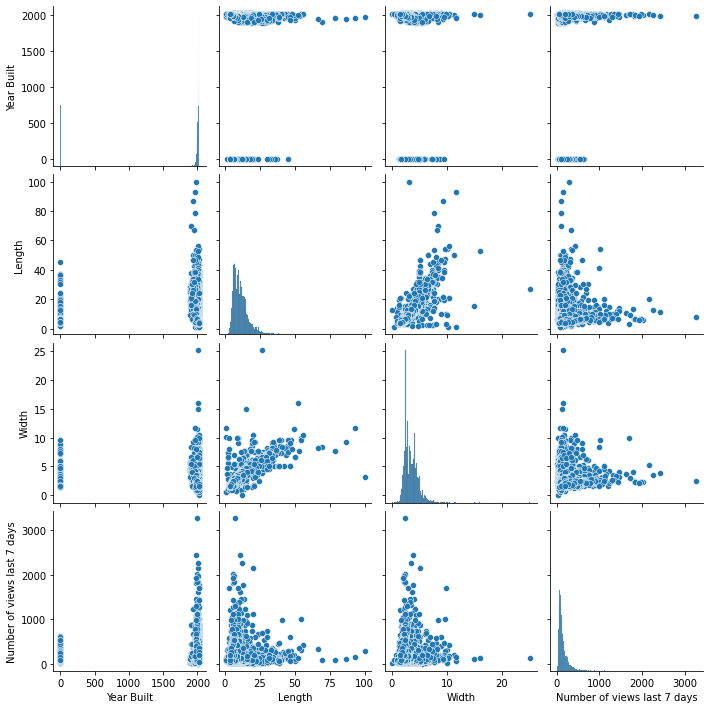

In [75]:
sns.pairplot(boat_data)

Getting the last line, where it is the relation between the views and all other numerical values, it possible to infer that news bots, with Lentgh until 12,5 and Width until 7, get a high number of views.  

Let's check how are the correlation. 

<AxesSubplot:>

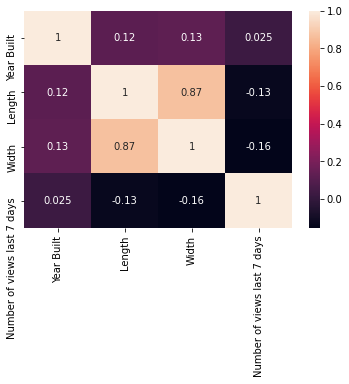

In [76]:
corr = boat_data[['Price','Year Built','Length','Width','Number of views last 7 days']].corr()
sns.heatmap(corr,annot=True)

The correlation here don't helps. Let's see if it is possible to improve this on the preparation. 

##### Length and Width

<AxesSubplot:xlabel='Width', ylabel='Number of views last 7 days'>

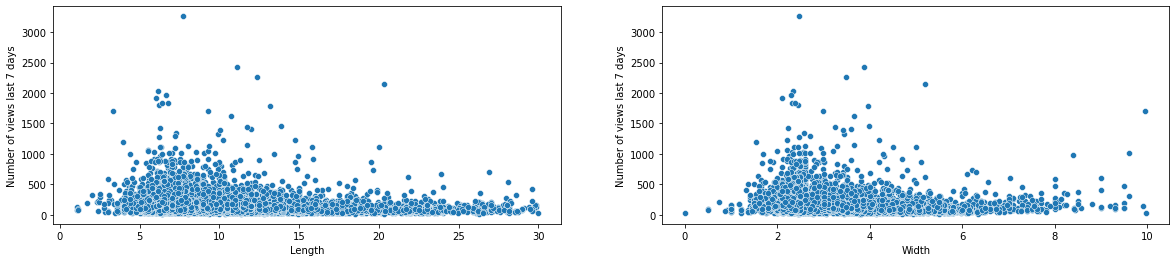

In [77]:
fig, axes = plt.subplots(1, 2, figsize=(20, 4))
 
sns.scatterplot(ax=axes[0], data = boat_data[boat_data['Length']<30], y= "Number of views last 7 days", x ="Length")
sns.scatterplot(ax=axes[1], data = boat_data[boat_data['Width']<10], y= "Number of views last 7 days", x ="Width")


On those graphics, it is get a important insight, that will be highlight on the summary report. The high  views numbers are on followed range 5 >= Length =<5, 2 >= Width <= 5.

<AxesSubplot:xlabel='Year Built'>

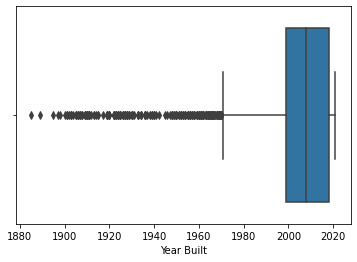

In [78]:
sns.boxplot(boat_data['Year Built'][boat_data["Year Built"] != 0])

##### Year

Base on PairPlot, it is possible to see that they Year has many low value. Lets take look closely. 

In [79]:
total_of_zerros = boat_data['Year Built'][boat_data["Year Built"] == 0].count()

They quantite of zeros are 549


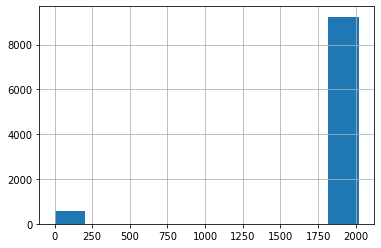

In [80]:
boat_data["Year Built"].hist()
print(f"They quantite of zeros are {total_of_zerros}")

From the hist and total of zeros on the year features we can that we have considerable amount of zeros. 

Let's plot a Violin to see how not zero Year profile.

<AxesSubplot:xlabel='Year Built'>

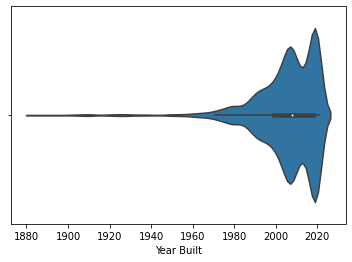

In [81]:
sns.violinplot(boat_data['Year Built'][boat_data["Year Built"] != 0])

Now it is clear that the built year of the are concentrated up to 2000. And the have a fee old boat. 

To not impact the year profile and not loss the information of boat have 0 on year. it will drisbute those until 1960.

In [82]:
boat_data['Year Built'][:1000][boat_data["Year Built"]== 0] = 1900
boat_data['Year Built'][1000:2000][boat_data["Year Built"]== 0] = 1910
boat_data['Year Built'][2000:4000][boat_data["Year Built"]== 0] = 1920
boat_data['Year Built'][4000:6000][boat_data["Year Built"]== 0] = 1930
boat_data['Year Built'][6000:7000][boat_data["Year Built"]== 0] = 1940
boat_data['Year Built'][7000:8000][boat_data["Year Built"]== 0] = 1950
boat_data['Year Built'][8000:][boat_data["Year Built"]== 0] = 1960

They quantite of zeros are 0


<AxesSubplot:xlabel='Year Built'>

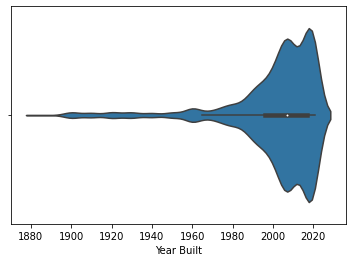

In [83]:
total_of_zerros = boat_data['Year Built'][boat_data["Year Built"] == 0].count()
print(f"They quantite of zeros are {total_of_zerros}")
sns.violinplot(boat_data['Year Built'])

##### Price

In [84]:
price_split = boat_data["Price"].str.split(" ",n = 1, expand = True)
boat_data["Currency"] = price_split[0]
boat_data["Price"] = price_split[1].astype("int")

Here, it is the transformation of the price. The has two part, (1) the Currency and (2) Price. To improve the model, it is necessary to split this and later on it will be encoder the Currency. 

<AxesSubplot:xlabel='Currency', ylabel='Total Samples'>

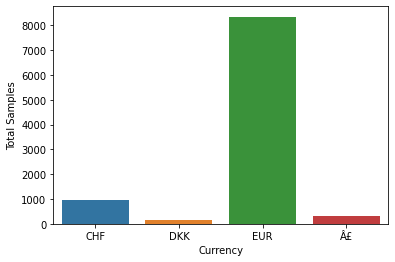

In [85]:
samples_by_currency = boat_data[["Price","Currency"]].groupby("Currency").count().reset_index().rename(columns = {"Price":"Total Samples"})
sns.barplot(x="Currency", y="Total Samples", data = samples_by_currency)


Here is other import insight. The big part of the samples are from Euro. 

In [86]:
boat_data = pd.get_dummies(boat_data, columns = ['Currency'])

Here, it is encoding of the Currency. 

#### Final Data - Ready for modeling.

Let's how the data look like before all transformation performed. 

In [87]:
boat_data[['Price','Year Built','Length','Width','Currency_CHF','Currency_DKK','Currency_EUR','Currency_Â£']]

,Price,Year Built,Length,Width,Currency_CHF,Currency_DKK,Currency_EUR,Currency_Â£
0,3337,2017,4.00,1.90,1,0,0,0
1,3490,2020,4.00,1.50,0,0,1,0
2,3770,1900,3.69,1.42,1,0,0,0
3,25900,2020,3.00,1.00,0,1,0,0
4,3399,2019,3.55,1.46,0,0,1,0
...,...,...,...,...,...,...,...,...
9883,4900,1987,6.30,2.44,1,0,0,0
9884,4516,1960,4.17,1.68,0,0,1,0
9885,4499,2020,4.40,1.80,0,0,1,0
9886,4300,2018,4.37,1.89,0,0,1,0


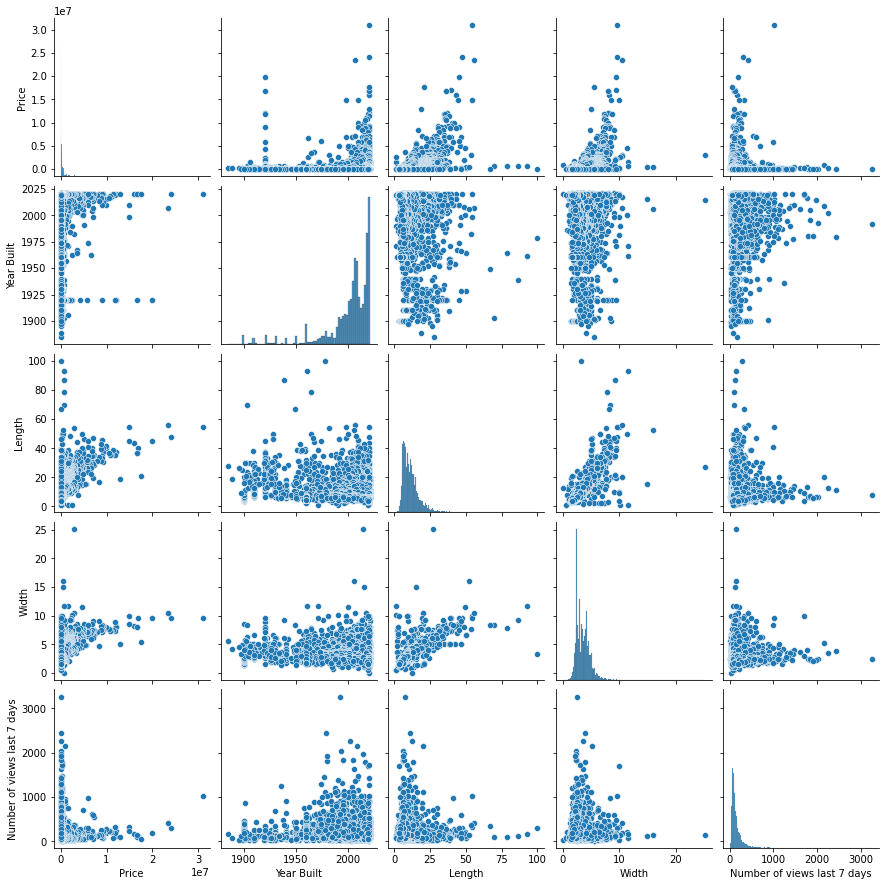

In [88]:
sns.pairplot(boat_data[['Price','Year Built','Length','Width','Number of views last 7 days']])

<AxesSubplot:>

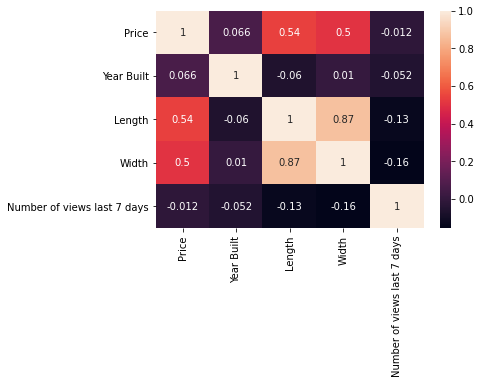

In [89]:
corr = boat_data[['Price','Year Built','Length','Width','Number of views last 7 days']].corr()
sns.heatmap(corr,annot=True)

The data now is prepare for be used on the model. It is possible to see that we improve the correlation and get better understand about relationship of the data. 

### Model Fitting and Evaluation.

In [90]:
boat_data[['Price','Year Built','Length','Width','Currency_CHF','Currency_DKK','Currency_EUR','Currency_Â£']].head()

,Price,Year Built,Length,Width,Currency_CHF,Currency_DKK,Currency_EUR,Currency_Â£
0,3337,2017,4.00,1.90,1,0,0,0
1,3490,2020,4.00,1.50,0,0,1,0
2,3770,1900,3.69,1.42,1,0,0,0
3,25900,2020,3.00,1.00,0,1,0,0
4,3399,2019,3.55,1.46,0,0,1,0


Above they are the features that will use to fit the model.

Once the business wants to predict a continues values, it is necessary to use a regression. To baseline the deployment it will use a basic liner regression and will compare this with Gradient Boosting Regressor and  Random Forest Regressor. 

As mean metric will use the Mean Absolute Percentage Error (MAPE) because this is best representation of the business requirements. Our target is to find a model that has MAPE bellow of 50, this it be enough to hit the Success Criteria define by the PM.      

In [91]:
from sklearn.metrics import *
from sklearn.model_selection import train_test_split

#boat_data[['Price','Currency','Year Built','Length','Width','Number of views last 7 days']]

X= boat_data[['Price','Year Built','Length','Width','Currency_CHF','Currency_DKK','Currency_EUR','Currency_Â£']]
y= boat_data[['Number of views last 7 days']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Above it was made the split of the dataset in the train and test. Bellow we will start to fit predict and get the metrics for the models. 

In [92]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(fit_intercept=True,n_jobs= -1,normalize = True).fit(X_train, y_train)
y_train_pred = lr.predict(X_train)

r2_score(y_train,y_train_pred)
print(f"R2_Score - {r2_score(y_train,y_train_pred)}")

y_test_pred = lr.predict(X_test)
print(f"MAPE - {mean_absolute_percentage_error(y_train,y_train_pred)}")

R2_Score - 0.21785309178721457
MAPE - 0.6974248993021588


Above it fit, predict and get the metrics for LR, see that metrics are far from the Success Criteria. 

In [93]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=1234, 
learning_rate=0.4,max_depth=2,max_features = 'log2', min_impurity_decrease = 0.2, min_samples_leaf= 4,min_samples_split = 7, min_weight_fraction_leaf= 0.0,n_estimators = 290,n_iter_no_change= None,
subsample = 1.0,tol=0.0001,validation_fraction=0.1,verbose= 0)

gbr.fit(X_train, y_train)
gbr.score(X_train, y_train)

y_train_pred = gbr.predict(X_train)
y_test_pred = gbr.predict(X_test)

print(f"R2_Score - {r2_score(y_train,y_train_pred)}")
print(f"MAPE - {mean_absolute_percentage_error(y_test,y_test_pred)}")

gbr.feature_importances_

residual_gbr = y_test["Number of views last 7 days"].values - y_test_pred


R2_Score - 0.44006837691494194
MAPE - 0.598473468579357


Above it fit, predict and get the metrics for GBR, see that metrics get improve and are closer to the Success Criteria. 

In [94]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(bootstrap=True,ccp_alpha=0.0,criterion='mae',max_depth=11,max_features=1.0,max_leaf_nodes=None,max_samples=None,min_impurity_decrease=0.0005,min_samples_leaf=6,min_samples_split=10,min_weight_fraction_leaf=0.0,n_estimators=70,n_jobs=-1,oob_score=False,random_state=5274,verbose=0,warm_start=False)
rf.fit(X_train, y_train)
rf.score(X_train, y_train)

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

print(f"R2_Score - {r2_score(y_train,y_train_pred)}")
print(f"MAPE - {mean_absolute_percentage_error(y_test,y_test_pred)}")

rf.feature_importances_

residual_rf = y_test["Number of views last 7 days"].values - y_test_pred

R2_Score - 0.4093237874847867
MAPE - 0.47751605032091576


Above it fit, predict and get the metrics for RF, see that metrics get improve and hit the Success Criteria. 

The Random Forest Regressor will be chose is best model, because the hit the Success Criteria and had the best performance on overall metrics.  

the residual is other good way to see the difference between the models. It is clear here that the RF is better model because the result are concentrated.

<AxesSubplot:>

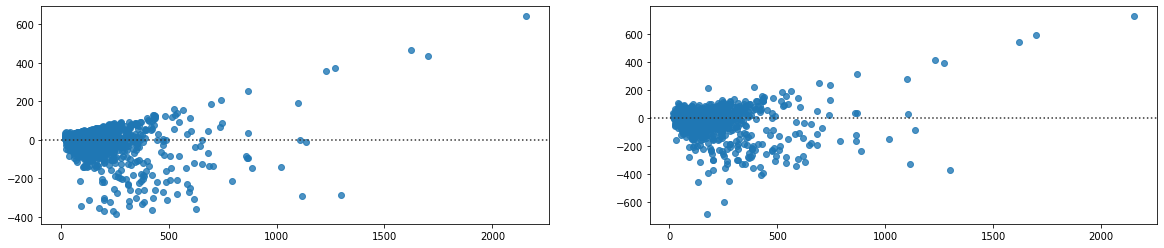

In [95]:
fig, axes = plt.subplots(1, 2, figsize=(20, 4))

sns.residplot(ax=axes[0], x= y_test["Number of views last 7 days"].values, y=  residual_rf )
sns.residplot(ax=axes[1],x= y_test["Number of views last 7 days"].values, y=  residual_gbr )



# Excutive Sumary

 ### Resume of Work.

In order to find a model that be able to hit Success Criteria many transformation were performed to change features and find a good model. During this process it was test 3 kinds of regression models. 

The model chose was the Regressor based on Random Forest. The mean metric was Mean Absolute Percentage Error (MAPE), because this better fit to requirements define by the business . 

The Random Forest performed better than Success Criteria and more daitls are provide on session bellow or in Tech Report above.   


### Business Golas

#### Can you predict the number of views a listing will receive based on the boat's features ? Yes, We Can.
     
Yes. It is possible with more than 50% off of the true number of views. The prediction has been made with Random Forest Regressor Model, which in the test performed could predict on average 53% of the values.

With this model from now on, the team has new tool that can be use to improve the views and make a better selection of the that will be available on site. 
 
Also, the graphic bellow show how the error for samples used on test. It is possible to see, that the model performs better for the case that total of views is bellow of 500 and getting to be worst when the views you increasing.   

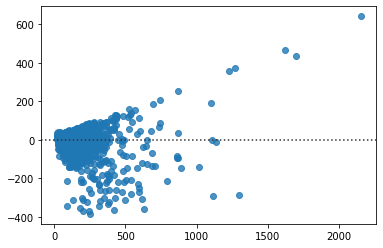

In [96]:
sns.residplot(x= y_test["Number of views last 7 days"].values, y=  residual_rf )
plt.show()

### Extra Insight and Futures Actions. 

- Importance of the features. 
The team should focus on capture the following future base on the importance to define the views. Table bellow show the features sort by importance. 

In [97]:
importance = pd.DataFrame(rf.feature_importances_, index = ['Price','Year Built','Length','Width','Currency_CHF','Currency_DKK','Currency_EUR','Currency_Â£'])
importance = importance.reset_index().rename(columns = {0:"Importance", "index" : "Feature"}).sort_values(by = "Importance", ascending = False).reset_index(drop = True)[1:].reset_index(drop = True)
importance

,Feature,Importance
0,Price,0.220048
1,Year Built,0.175960
2,Length,0.139331
3,Width,0.114411
4,Currency_DKK,0.002411
5,Currency_Â£,0.001563
6,Currency_EUR,0.001056


* Focus on boat with Price < 200 k, Year > 1980 , Length <= 15, Width <= 5.
This concluions com from the graphics to bellow.

<AxesSubplot:xlabel='Width', ylabel='Number of views last 7 days'>

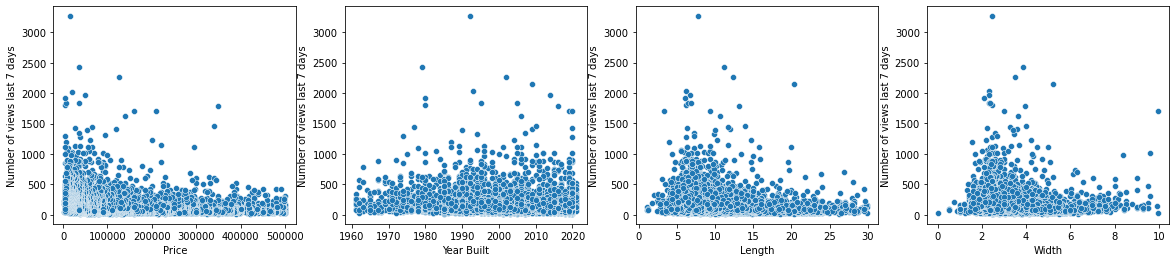

In [98]:
import matplotlib.pyplot as plt
 
 
fig, axes = plt.subplots(1, 4, figsize=(20, 4))
 
sns.scatterplot(ax=axes[0], data = boat_data[boat_data['Price']<500000], y= "Number of views last 7 days", x ="Price")
sns.scatterplot(ax=axes[1], data = boat_data[boat_data['Year Built']>1960], y= "Number of views last 7 days", x ="Year Built")
sns.scatterplot(ax=axes[2], data = boat_data[boat_data['Length']<30], y= "Number of views last 7 days", x ="Length")
sns.scatterplot(ax=axes[3], data = boat_data[boat_data['Width']<10], y= "Number of views last 7 days", x ="Width")

#'Length','Width'

* Futures Actions - Transform the Currency to Euros
Transform all currencies to EUR, this many improve the quality to model. As show bellow EUR has the big amount of samples.

<AxesSubplot:xlabel='Currency', ylabel='Total Samples'>

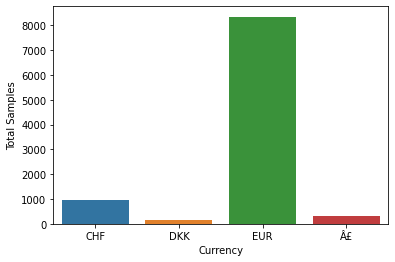

In [99]:
sns.barplot(x="Currency", y="Total Samples", data = samples_by_currency)